# 베이즈추정관점에서 인위적으로 만든 분포

# 베타분포 0~1

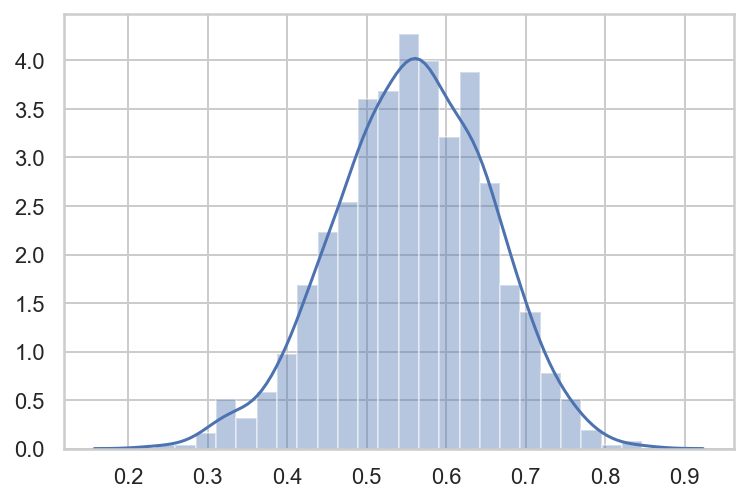

In [3]:
x = sp.stats.beta(15, 12).rvs(1000)

sns.distplot(x)
plt.show()
%matplotlib inline

# 감마분포 0 >= 

# 디리클레분포
**디리클레분포(Dirichlet distribution)**는 베타분포의 확장판이라고 할 수 있다. 베타분포는 0과 1사이의 값을 가지는 단일(univariate) 확률변수의 베이지안 모형에 사용되고 디리클레분포는 0과 1사이의 사이의 값을 가지는 다변수(multivariate) 확률변수의 베이지안 모형에 사용된다.

# 모수추정

## 1단계 샘플을 보고 어떠한 확률분포를 따르는지를 판단

연습문제 9.1.1

In [2]:
from sklearn.datasets import load_boston

In [9]:
boston = load_boston()

In [11]:
dfX = pd.DataFrame(boston.data, columns=boston.feature_names)
dfY = pd.DataFrame(boston.target, columns=["MEDV"])
df = pd.concat([dfX, dfY], axis = 1)

In [12]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


# 베타분포의 모수추정

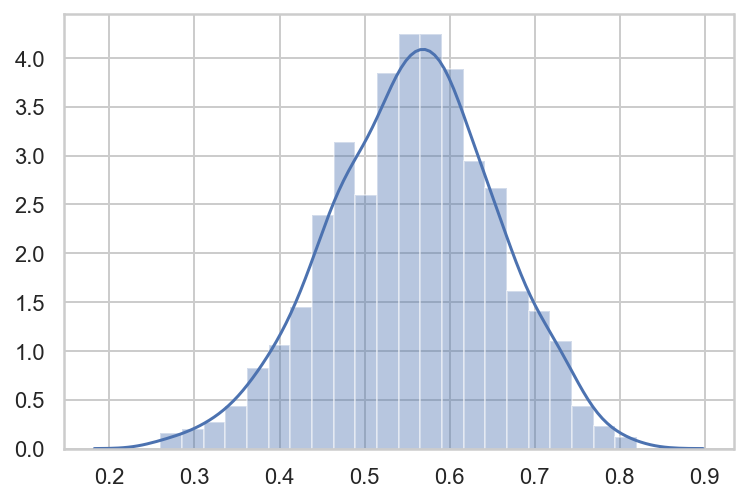

In [4]:
x = sp.stats.beta(15, 12).rvs(1000)

sns.distplot(x)
plt.show()
%matplotlib inline

In [5]:
def estimate_beta(x):
    x_bar = x.mean()
    s2 = x.var()
    a = x_bar * (x_bar * (1 - x_bar) / s2 - 1)
    b = (1 - x_bar) * (x_bar * (1 - x_bar) / s2 - 1)
    return a, b


params = estimate_beta(x)
print(params)

(13.946632881838584, 11.121689948443107)


# 90%로 사용하는 최대가능도 추정법

# 가능도 : 확률밀도함수를 가능도라고 부른다

## 𝑝(𝑥;𝜃)

## 𝐿(𝜃;𝑥)=𝑝(𝑥;𝜃)

# 예를 들어 정규분포라면 

<img src = "Screen Shot 0002-10-16 at 08.59.59.png">

# Maximum Likelihood Estimation, MLE

## 𝜃̂ MLE = arg max𝜃 𝐿(𝜃;𝑥) 주어진 표본에 대해 가능도를 가장 크게하는 모수 theta를 찾는 방법

theta를 바꿔가면서 찾아간다